## 1 Import and install dependencies

In [1]:
# downloading tensflow and mediapipe
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [2]:
#importing necessary libraries 
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time 
import mediapipe as mp

## 2 Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    # Draw face connections (Updated with FACE_CONNECTIONS from mp.solutions.face_mesh)
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)  # Updated attribute
    
    # Draw pose connections (No change)
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

    # Draw left hand connections (No change)
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

    # Draw right hand connections (No change)
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


I0000 00:00:1748766294.414550 1998869 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1748766294.493809 1999408 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748766294.510620 1999408 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748766294.513581 1999405 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748766294.513716 1999407 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748766294.513763 1999410 inference_feedback_manager.cc:114] Feedback manager requires a mod

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.left_hand_landmarks.landmark) if results.left_hand_landmarks else 0

21

In [9]:
draw_landmarks(frame, results)

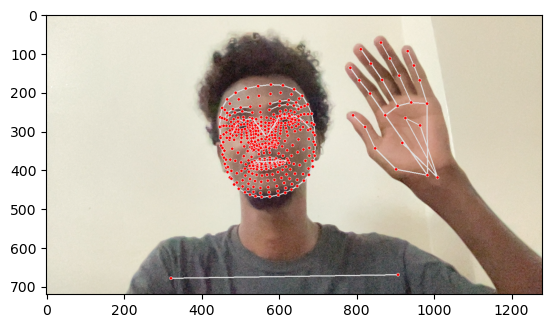

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## 3 extract keypoint values

In [11]:
len(results.left_hand_landmarks.landmark) if results.left_hand_landmarks else 0

21

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:

pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
#face landmarks|video|action
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
print(face)

# Left hand landmarks
left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
print("Left hand landmarks:", left_hand)

# Right hand landmarks
right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
print("Right hand landmarks:", right_hand)

# Combine both hands
both_hands = np.concatenate([left_hand, right_hand])
print("Both hands combined:", both_hands)

[ 0.44086576  0.51737344 -0.02919323 ...  0.50127053  0.36777386
  0.01380488]
Left hand landmarks: [ 7.69165814e-01  5.75926602e-01  3.97839450e-08  7.05965221e-01
  5.54415703e-01 -4.93713701e-03  6.64018571e-01  4.79345888e-01
 -1.43926567e-03  6.43539786e-01  4.03911173e-01 -2.98220810e-04
  6.18971825e-01  3.61187667e-01  1.48076462e-04  6.83825195e-01
  3.61943603e-01  1.67623535e-02  6.53155565e-01  2.83509701e-01
  9.73961130e-03  6.32006645e-01  2.36647472e-01 -5.26955002e-04
  6.13771975e-01  1.92443132e-01 -9.69223026e-03  7.08858311e-01
  3.28789532e-01  8.08590092e-03  6.78117633e-01  2.35164255e-01
  7.04780279e-04  6.55444205e-01  1.76915213e-01 -1.22505408e-02
  6.34673059e-01  1.25276610e-01 -2.24328618e-02  7.36425877e-01
  3.16401988e-01 -3.83961829e-03  7.11925447e-01  2.19664633e-01
 -1.46847814e-02  6.93559110e-01  1.58432052e-01 -2.60355193e-02
  6.75260127e-01  1.02463648e-01 -3.45009640e-02  7.68290937e-01
  3.20325196e-01 -1.69928968e-02  7.53261209e-01  2.369

In [15]:
import numpy as np

def extract_keypoints(results):
    pose = np.zeros(33 * 4)
    face = np.zeros(468 * 3)
    lh = np.zeros(21 * 3)
    rh = np.zeros(21 * 3)

    # Pose: 33 landmarks * (x, y, z, visibility)
    if results.pose_landmarks:
        pose = np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in results.pose_landmarks.landmark]).flatten()

    # Face: 468 landmarks * (x, y, z)
    if results.face_landmarks:
        face = np.array([[lm.x, lm.y, lm.z] for lm in results.face_landmarks.landmark]).flatten()

    # Left hand: 21 landmarks * (x, y, z)
    if results.left_hand_landmarks:
        lh = np.array([[lm.x, lm.y, lm.z] for lm in results.left_hand_landmarks.landmark]).flatten()

    # Right hand: 21 landmarks * (x, y, z)
    if results.right_hand_landmarks:
        rh = np.array([[lm.x, lm.y, lm.z] for lm in results.right_hand_landmarks.landmark]).flatten()

    return np.concatenate([pose, face, lh, rh])

   

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.44524249,  0.44003975, -0.79493588, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
468*3+33*4+21*3+21*3

1662

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.44524249,  0.44003975, -0.79493588, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
#checking if the path exist
print(os.path.exists('0.npy'))

True


## 4 set up folders for collection

In [24]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['me', 'you', 'friend','name',' mine', 'who','how','please','help-me', 'wait', 'now','home','where','give-me',
                   'thank-you', 'polite', 'hello', 'good', 'mother', 'father','uncle','cousing', 'brother','sister','doughter','parent','relative','yes','no','sorry'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [25]:
# Actions that need to be recollected
actions_to_redo = np.array(['where', 'give-me', 'cousing', 'doughter', 'yes'])


In [26]:
for action in actions_to_redo:

    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [137]:
#re-collecting actions for 'where', 'give-me', 'cousing', 'doughter', 'yes'


# Example values — make sure to define them or import appropriately
no_sequences = 30         # Number of videos per action
sequence_length = 30      # Length of each video
DATA_PATH = os.path.join('MP_Data')  # Update as per your directory
actions_to_redo = np.array(['where', 'give-me', 'cousing', 'doughter', 'yes'])

mp_holistic = mp.solutions.holistic

cap = cv2.VideoCapture(0)

# Set up Mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action in actions_to_redo:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()

                # Run detection
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)

                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                # Save keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                os.makedirs(os.path.dirname(npy_path), exist_ok=True)
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

cap.release()
cv2.destroyAllWindows()


I0000 00:00:1748763634.332233 1909442 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1
W0000 00:00:1748763634.412441 1975906 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748763634.428485 1975913 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748763634.430899 1975913 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748763634.431274 1975907 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748763634.431407 1975912 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

## 5 collect keypoints values for trainig and tesing

In [24]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1748670956.758699 1228430 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1
W0000 00:00:1748670956.838050 1235357 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748670956.854926 1235358 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748670956.857971 1235360 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748670956.858304 1235356 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748670956.859500 1235357 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

In [25]:
cap.release()
cv2.destroyAllWindows()

## 6 preprocess data and create labels and features

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [28]:
label_map = {label:num for num, label in enumerate(actions)}

In [29]:
label_map

{'me': 0,
 'you': 1,
 'friend': 2,
 'name': 3,
 ' mine': 4,
 'who': 5,
 'how': 6,
 'please': 7,
 'help-me': 8,
 'wait': 9,
 'now': 10,
 'home': 11,
 'where': 12,
 'give-me': 13,
 'thank-you': 14,
 'polite': 15,
 'hello': 16,
 'good': 17,
 'mother': 18,
 'father': 19,
 'uncle': 20,
 'cousing': 21,
 'brother': 22,
 'sister': 23,
 'doughter': 24,
 'parent': 25,
 'relative': 26,
 'yes': 27,
 'no': 28,
 'sorry': 29}

In [30]:
sequences = []
labels = []

for action in actions:
    folder = os.path.join(DATA_PATH, action)
    for sequence_folder in os.listdir(folder):
        # Skip non-numeric or hidden files/folders
        if not sequence_folder.isdigit():
            continue

        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(folder, sequence_folder, f"{frame_num}.npy"))
            window.append(res)

        sequences.append(window)
        labels.append(label_map[action])



In [31]:
print(f"Number of sequences: {len(sequences)}")
print(f"Number of labels: {len(labels)}")


Number of sequences: 900
Number of labels: 900


In [32]:
import os
from collections import Counter

class_counts = {}
for action in actions:
    folder = os.path.join(DATA_PATH, action)
    if os.path.isdir(folder):
        class_counts[action] = len(os.listdir(folder))

print("Class distribution:")
print(class_counts)


Class distribution:
{'me': 30, 'you': 30, 'friend': 30, 'name': 30, ' mine': 31, 'who': 30, 'how': 30, 'please': 30, 'help-me': 30, 'wait': 30, 'now': 30, 'home': 30, 'where': 30, 'give-me': 30, 'thank-you': 30, 'polite': 30, 'hello': 30, 'good': 30, 'mother': 30, 'father': 30, 'uncle': 30, 'cousing': 30, 'brother': 30, 'sister': 30, 'doughter': 30, 'parent': 30, 'relative': 30, 'yes': 30, 'no': 30, 'sorry': 30}


In [33]:
np.array(sequences).shape

(900, 30, 1662)

In [34]:
np.array(labels).shape

(900,)

In [35]:
X = np.array(sequences)

In [36]:
X.shape

(900, 30, 1662)

In [37]:
y = to_categorical(labels).astype(int)

In [38]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [39]:
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")


Length of X: 900
Length of y: 900


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [41]:
X_train.shape

(855, 30, 1662)

## 7 build and train LSTM neural network

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [54]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

num_classes = len(actions)  # 30
sequence_length = 30        # frames per sequence
feature_dim = 1662          # features per frame

model = Sequential()

# 1st LSTM layer with return_sequences=True to feed next LSTM layer
model.add(LSTM(128, return_sequences=True, input_shape=(sequence_length, feature_dim)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# 2nd LSTM layer with return_sequences=True
model.add(LSTM(256, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# 3rd LSTM layer without return_sequences (last layer in stack)
model.add(LSTM(128))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layers for final classification
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax for multi-class

# Compile model with Adam optimizer and categorical crossentropy
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 128)        │       916,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 30, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │         1,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537,118 (5.86 MB)

 Trainable params: 1,536,094 (5.86 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [56]:
print("res shape:", res.shape)
print("res:", res)
print("argmax:", np.argmax(res))


res shape: (1, 30)
res: [[0.03472945 0.03395833 0.0311649  0.02846186 0.03517286 0.03318618
  0.03397485 0.03282369 0.03493912 0.03173398 0.03372073 0.02936378
  0.03228    0.03072066 0.03001503 0.03361151 0.03092855 0.03237053
  0.03308015 0.03261356 0.03336368 0.03574934 0.03346915 0.03373907
  0.03591396 0.03706613 0.03608374 0.03723212 0.03336991 0.0351631 ]]
argmax: 27


In [57]:
print("Number of actions:", len(actions))  # should be 30

print("Label map size:", len(label_map))  # should be 30

print("Example label_map:", label_map)


Number of actions: 30
Label map size: 30
Example label_map: {'me': 0, 'you': 1, 'friend': 2, 'name': 3, ' mine': 4, 'who': 5, 'how': 6, 'please': 7, 'help-me': 8, 'wait': 9, 'now': 10, 'home': 11, 'where': 12, 'give-me': 13, 'thank-you': 14, 'polite': 15, 'hello': 16, 'good': 17, 'mother': 18, 'father': 19, 'uncle': 20, 'cousing': 21, 'brother': 22, 'sister': 23, 'doughter': 24, 'parent': 25, 'relative': 26, 'yes': 27, 'no': 28, 'sorry': 29}


In [58]:
sample = X_test[0]  # shape (30, 1662)
sample = np.expand_dims(sample, axis=0)  # shape (1, 30, 1662)

res = model.predict(sample)  # shape (1, 30)
print("res shape:", res.shape)
print("res:", res)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
res shape: (1, 30)
res: [[0.03355471 0.03490905 0.03379939 0.03359847 0.03220809 0.03073077
  0.03184196 0.03173986 0.03488377 0.03150737 0.03217792 0.033494
  0.03228331 0.03163049 0.03052589 0.03151535 0.03649554 0.03633758
  0.03416077 0.03184863 0.03384094 0.03311594 0.03586391 0.03139003
  0.03411027 0.03387557 0.03377839 0.03432973 0.03619905 0.03425325]]


In [59]:
predicted_index = np.argmax(res[0])  # get the index of the max probability in the first batch
predicted_action = actions[predicted_index]

print("Predicted class index:", predicted_index)
print("Predicted action:", predicted_action)


Predicted class index: 16
Predicted action: hello


In [60]:
sample = X_test[0]
sample = np.expand_dims(sample, axis=0)

res = model.predict(sample)

predicted_index = np.argmax(res[0])
predicted_action = actions[predicted_index]

print(f"Predicted action: {predicted_action}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted action: hello


In [61]:
actions[np.argmax(res)]

'hello'

In [62]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [64]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [67]:
#model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32,
          callbacks=[early_stop, checkpoint, reduce_lr])


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - categorical_accuracy: 0.9736 - loss: 0.1053

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - categorical_accuracy: 0.9736 - loss: 0.1054 - val_categorical_accuracy: 0.8889 - val_loss: 0.2665 - learning_rate: 1.2500e-04
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - categorical_accuracy: 0.9788 - loss: 0.0844 - val_categorical_accuracy: 0.8667 - val_loss: 0.2887 - learning_rate: 1.2500e-04
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - categorical_accuracy: 0.9820 - loss: 0.0997 - val_categorical_accuracy: 0.9111 - val_loss: 0.3251 - learning_rate: 1.2500e-04
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - categorical_accuracy: 0.9656 - loss: 0.1184
Epoch 4: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - categorical_accuracy: 0.9657 - loss: 0.1180 - val_categorical_accuracy: 0.8667 - val_loss: 0.3332 - learning_rate: 1.2500e-04
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - categorical_accuracy: 0.9665 - loss: 0.1097

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - categorical_accuracy: 0.9668 - loss: 0.1092 - val_categorical_accuracy: 0.9333 - val_loss: 0.1029 - learning_rate: 6.2500e-05
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - categorical_accuracy: 0.9762 - loss: 0.1013 - val_categorical_accuracy: 0.9333 - val_loss: 0.1067 - learning_rate: 6.2500e-05
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - categorical_accuracy: 0.9735 - loss: 0.0902

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - categorical_accuracy: 0.9732 - loss: 0.0905 - val_categorical_accuracy: 0.9556 - val_loss: 0.0910 - learning_rate: 6.2500e-05
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - categorical_accuracy: 0.9707 - loss: 0.1008

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - categorical_accuracy: 0.9708 - loss: 0.1006 - val_categorical_accuracy: 0.9778 - val_loss: 0.0558 - learning_rate: 6.2500e-05
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - categorical_accuracy: 0.9652 - loss: 0.0969

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - categorical_accuracy: 0.9654 - loss: 0.0966 - val_categorical_accuracy: 0.9778 - val_loss: 0.0444 - learning_rate: 6.2500e-05
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - categorical_accuracy: 0.9783 - loss: 0.0786 - val_categorical_accuracy: 0.9778 - val_loss: 0.0557 - learning_rate: 6.2500e-05
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - categorical_accuracy: 0.9801 - loss: 0.0718 - val_categorical_accuracy: 0.9556 - val_loss: 0.0564 - learning_rate: 6.2500e-05
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - categorical_accuracy: 0.9701 - loss: 0.1188
Epoch 12: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - categorical_accuracy: 0.9704 - loss: 0.1181 - val_categorical_accuracy: 0.9333 - val_loss: 0.1227 - learning_rate: 6.2500e-05
Epoch 13/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - categorical_accuracy: 0.9711 - loss: 0.0942 - val_categorical_accuracy

## 8 make prediction

In [68]:
res = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


In [69]:
np.argmax(res[0])

6

In [70]:
print("Predicted class index:", np.argmax(res[0]))
print("Predicted action:", actions[np.argmax(res[0])])


Predicted class index: 6
Predicted action: how


In [71]:

# Pick a sample from X_test (shape: (30, 1662))
sample = X_test[0]

# Expand dimensions to add batch size of 1: (1, 30, 1662)
sample = np.expand_dims(sample, axis=0)

# Get prediction (shape: (1, 30) if model outputs 30 classes, or (1, num_classes))
res = model.predict(sample)

# If model output shape is (1, num_classes), get class index:
predicted_class_index = np.argmax(res[0])

# Print predicted label
print("Predicted class index:", predicted_class_index)
print("Predicted label:", actions[predicted_class_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class index: 6
Predicted label: how


In [72]:
predicted_class_index = np.argmax(res[0][-1])


In [73]:
actions[6]

'how'

In [74]:
np.sum(res[0])

1.0000001

In [75]:
actions[np.argmax(res[0])]


'how'

In [76]:
actions[np.argmax(y_test[0])]

'how'

In [77]:
res = model.predict(X_test)

for i in range(29):  # Check first 10 test samples
    predicted = actions[np.argmax(res[i])]
    actual = actions[np.argmax(y_test[i])]
    print(f"Sample {i}: Predicted = {predicted}, Actual = {actual}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Sample 0: Predicted = how, Actual = how
Sample 1: Predicted = father, Actual = father
Sample 2: Predicted = relative, Actual = relative
Sample 3: Predicted = relative, Actual = relative
Sample 4: Predicted = parent, Actual = uncle
Sample 5: Predicted = friend, Actual = friend
Sample 6: Predicted = thank-you, Actual = thank-you
Sample 7: Predicted = relative, Actual = relative
Sample 8: Predicted = who, Actual = who
Sample 9: Predicted = give-me, Actual = give-me
Sample 10: Predicted = doughter, Actual = doughter
Sample 11: Predicted = hello, Actual = hello
Sample 12: Predicted = parent, Actual = parent
Sample 13: Predicted = who, Actual = who
Sample 14: Predicted = wait, Actual = wait
Sample 15: Predicted = home, Actual = home
Sample 16: Predicted = cousing, Actual = cousing
Sample 17: Predicted =  mine, Actual =  mine
Sample 18: Predicted = sister, Actual = sister
Sample 19: Predicted = no, Actual = no
Sample 20: Predicted = good, Actual = good
Sa

In [78]:
for i in range(len(X_test)):
    sample = np.expand_dims(X_test[i], axis=0)
    res = model.predict(sample)
    pred_class = actions[np.argmax(res[0])]
    true_class = actions[np.argmax(y_test[i])]
    print(f"Sample {i}: Predicted = {pred_class}, Actual = {true_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Sample 0: Predicted = how, Actual = how
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Sample 1: Predicted = father, Actual = father
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Sample 2: Predicted = relative, Actual = relative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Sample 3: Predicted = relative, Actual = relative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Sample 4: Predicted = parent, Actual = uncle
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Sample 5: Predicted = friend, Actual = friend
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Sample 6: Predicted = thank-you, Actual = thank-you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Sample 7: Predicted = relative, Actual = relative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Sample 8: Predicted = who, Actual = who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Sample 9: Predicted = give-me, Actual = give-me
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Sample 10: Predicted = doughter, Actual = doughter
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Sample 11: Predicted = hel

## 9 save weights

In [79]:
model.save('action.h5')

## 10 evaluation using confution matrix and and accuracy

In [80]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [81]:
yhat = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [82]:
#these cells converts the prediction from their one-hot encoded representation to categorical 
#e.g 0,1 or 2 as apposed to [1,0,0], [0,1,0] or [0,0,1]


ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [83]:
ytrue

[6,
 19,
 26,
 26,
 20,
 2,
 14,
 26,
 5,
 13,
 24,
 16,
 25,
 5,
 9,
 11,
 21,
 4,
 23,
 28,
 17,
 2,
 16,
 6,
 24,
 12,
 23,
 10,
 15,
 4,
 28,
 29,
 24,
 1,
 9,
 21,
 6,
 24,
 2,
 2,
 17,
 0,
 22,
 9,
 25]

In [84]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[44,  0],
        [ 0,  1]],

       [[44,  0],
        [ 0,  1]],

       [[41,  0],
        [ 0,  4]],

       [[43,  0],
        [ 0,  2]],

       [[43,  0],
        [ 0,  2]],

       [[42,  0],
        [ 0,  3]],

       [[42,  0],
        [ 0,  3]],

       [[44,  0],
        [ 0,  1]],

       [[44,  0],
        [ 0,  1]],

       [[44,  0],
        [ 0,  1]],

       [[44,  0],
        [ 0,  1]],

       [[44,  0],
        [ 0,  1]],

       [[44,  0],
        [ 0,  1]],

       [[43,  0],
        [ 0,  2]],

       [[43,  0],
        [ 0,  2]],

       [[44,  0],
        [ 0,  1]],

       [[44,  0],
        [ 1,  0]],

       [[43,  0],
        [ 0,  2]],

       [[44,  0],
        [ 0,  1]],

       [[43,  0],
        [ 0,  2]],

       [[41,  0],
        [ 0,  4]],

       [[42,  1],
        [ 0,  2]],

       [[42,  0],
        [ 0,  3]],

       [[43,  0],
        [ 0,  2]],

       [[44,  0],
        [ 0,  1]]])

In [85]:
accuracy_score(ytrue, yhat)

0.9777777777777777

In [86]:
from sklearn.metrics import classification_report
print(classification_report(ytrue, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         1
          20       0.00      0.00      0.00         1
          21       1.00    

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


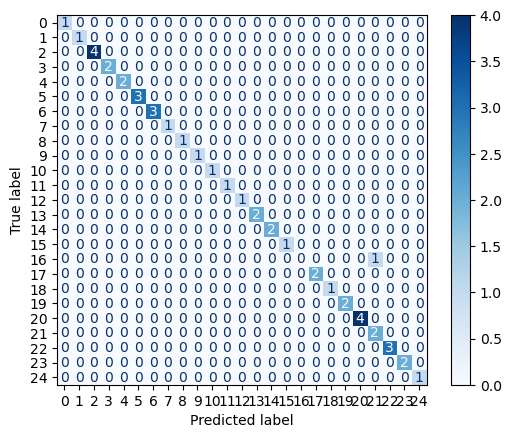

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(ytrue, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## 11 test in real time

sequence = []
sentence = []
predictions = []
threshold = 0.4

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()

        # 1. Make detections with MediaPipe
        image, results = mediapipe_detection(frame, holistic)

        # 2. Draw landmarks on the image
        draw_styled_landmarks(image, results)

        # 3. Extract keypoints and append to sequence
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # keep last 30 frames

        # 4. Predict when we have 30 frames
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_class = np.argmax(res)
            print(actions[predicted_class])
            predictions.append(predicted_class)

            # 5. Prediction smoothing and thresholding
            if len(predictions) >= 10:
                last_10_preds = predictions[-10:]
                # Check if last 10 predictions are the same class and matches current prediction
                if len(set(last_10_preds)) == 1 and last_10_preds[0] == predicted_class:
                    # Check probability threshold
                    if res[predicted_class] > threshold:
                        # Append only if different from last appended action
                        if len(sentence) == 0 or actions[predicted_class] != sentence[-1]:
                            sentence.append(actions[predicted_class])

            # Keep sentence length manageable
            if len(sentence) > 5:
                sentence = sentence[-5:]

        # 6. Visualize sentence on image
        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # 7. Show image
        cv2.imshow('OpenCV Feed', image)

        # 8. Graceful exit
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [91]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from collections import deque

# Define the actions (same as your training labels)
actions = np.array(['me', 'you', 'friend','name','mine', 'who','how','please','help-me', 'wait', 'now','home','where','give-me',
                   'thank-you', 'polite', 'hello', 'good', 'mother', 'father','uncle','cousing', 'brother','sister','doughter','parent','relative','yes','no','sorry'])

# Rule-based sentence builder
def build_sentence(words):
    if not words:
        return ""

    # Remove duplicates while preserving order
    unique_words = list(dict.fromkeys(words))

    # Convert to a set for easier matching
    word_set = set(unique_words)

    # Fixed logic for specific combinations
    if word_set >= {'help-me', 'please', 'me'}:
        return "Please help me."
    elif word_set >= {'help-me', 'please'}:
        return "Help me, please."
    elif word_set >= {'where', 'home'}:
        return "Where is my home?"
    elif word_set >= {'where', 'mother'}:
        return "Where is my mother?"
    elif word_set >= {'where', 'father'}:
        return "Where is my father?"
    elif word_set >= {'who', 'you'}:
        return "Who are you?"
    elif word_set >= {'give-me', 'name'}:
        return "Give me your name."
    elif word_set >= {'thank-you', 'polite'}:
        return "Thank you. That's polite."
    elif word_set >= {'you', 'good'}:
        return "You are good."
    elif word_set >= {'hello', 'friend'}:
        return "Hello, friend!"
    elif word_set >= {'sorry', 'me'} or word_set >= {'sorry', 'mine'}:
        return "I'm sorry."
    elif word_set >= {'me', 'name'} or word_set >= {'mine', 'name'}:
        return "My name is ..."
    elif word_set >= {'how', 'you'}:
        return "How are you?"
    elif word_set >= {'give-me', 'home'}:
        return "Give me the home address."
    elif word_set >= {'me', 'mother'}:
        return "This is my mother."
    elif word_set >= {'me', 'father'}:
        return "This is my father."
    elif word_set >= {'me', 'friend'}:
        return "This is my friend."
    elif word_set >= {'now', 'help-me'}:
        return "Help me now!"
    elif word_set >= {'wait', 'please'}:
        return "Please wait."
    elif word_set >= {'give-me', 'doughter'}:
        return "Give me my daughter."
    elif word_set >= {'you', 'uncle'}:
        return "You are my uncle."
    elif word_set >= {'you', 'parent'}:
        return "You are my parent."
    elif word_set >= {'me', 'relative'}:
        return "You are my relative."

    # Fallback: simple concatenation
    return " ".join(unique_words).capitalize() + "."


# Live detection code
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()

        # 1. Make detections with MediaPipe
        image, results = mediapipe_detection(frame, holistic)

        # 2. Draw landmarks on the image
        draw_styled_landmarks(image, results)

        # 3. Extract keypoints and append to sequence
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # keep last 30 frames

        # 4. Predict when we have 30 frames
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_class = np.argmax(res)
            print(actions[predicted_class])
            predictions.append(predicted_class)

            # 5. Prediction smoothing and thresholding
            if len(predictions) >= 10:
                last_10_preds = predictions[-10:]
                if len(set(last_10_preds)) == 1 and last_10_preds[0] == predicted_class:
                    if res[predicted_class] > threshold:
                        if len(sentence) == 0 or actions[predicted_class] != sentence[-1]:
                            sentence.append(actions[predicted_class])

            if len(sentence) > 5:
                sentence = sentence[-5:]

        # 🧠 Build final readable sentence
        final_sentence = build_sentence(sentence)

        # 6. Visualize rule-based sentence
        cv2.rectangle(image, (0, 0), (800, 60), (245, 117, 16), -1)
        cv2.putText(image, final_sentence, (3, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 255), 2, cv2.LINE_AA)

        # 7. Show image
        cv2.imshow('OpenCV Feed', image)

        # 8. Graceful exit
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


I0000 00:00:1748770265.424092 1998869 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1
W0000 00:00:1748770265.501121 2116893 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748770265.518317 2116893 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748770265.520599 2116893 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748770265.521292 2116896 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748770265.521258 2116898 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
who
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/s

In [107]:
top_n = 3
top_indices = res.argsort()[-top_n:][::-1]

print("\nTop predictions:")
for i in top_indices:
    print(f"{actions[i]}: {res[i]:.2f}")



Top predictions:
me: 0.51
 mine: 0.31
relative: 0.08


In [145]:
cap.release()
cv2.destroyAllWindows()